In [1]:
import pandas as pd
import numpy as np
import pyreadstat as st
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [2]:
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\DiTella\MEC\Materias\2024 3T\[MT06] Microeconometría I\Clases\Stata\auto.dta"

df, meta = st.read_dta(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          74 non-null     object 
 1   price         74 non-null     int64  
 2   mpg           74 non-null     int64  
 3   rep78         69 non-null     object 
 4   headroom      74 non-null     float64
 5   trunk         74 non-null     int64  
 6   weight        74 non-null     int64  
 7   length        74 non-null     int64  
 8   turn          74 non-null     int64  
 9   displacement  74 non-null     int64  
 10  gear_ratio    74 non-null     float64
 11  foreign       74 non-null     int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 7.1+ KB


In [3]:
df['foreign'].value_counts()

foreign
0    52
1    22
Name: count, dtype: int64

In [4]:
df.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3,2.5,11,2930,186,40,121,3.58,0
1,AMC Pacer,4749,17,3,3.0,11,3350,173,40,258,2.53,0
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,0
3,Buick Century,4816,20,3,4.5,16,3250,196,40,196,2.93,0
4,Buick Electra,7827,15,4,4.0,20,4080,222,43,350,2.41,0


In [5]:
#Vamos a estimar la probabilidad de comprar un auto importado (foreign) en función del peso del auto (weight), y consumo del auto (mpg).

In [6]:
# Agregar la constante (intercepto)
df['const'] = 1

# Definir las variables dependiente (lfp) e independiente (salario_ofrecido)
X = df[['weight', 'mpg', 'const']]  # Variable independiente con constante
y = df['foreign']  # Variable dependiente

# Ajustar el modelo Probit
probit_model = sm.Probit(y, X)
result_probit = probit_model.fit()

# Mostrar los resultados del modelo Probit
print(result_probit.summary())

Optimization terminated successfully.
         Current function value: 0.362759
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                foreign   No. Observations:                   74
Model:                         Probit   Df Residuals:                       71
Method:                           MLE   Df Model:                            2
Date:                Tue, 21 Jan 2025   Pseudo R-squ.:                  0.4039
Time:                        20:24:50   Log-Likelihood:                -26.844
converged:                       True   LL-Null:                       -45.033
Covariance Type:            nonrobust   LLR p-value:                 1.261e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
weight        -0.0023      0.001     -4.126      0.000      -0.003      -0.001
mpg           -0.1040      0.

In [7]:
# Obtener el "xb": argumento de la probabilidad
df['xb'] = result_probit.predict(which='linear')

# Mostrar los primeros valores de 'xb' para verificar
print(df['xb'].head())


0   -0.854589
1   -1.315766
2   -0.177281
3   -1.394063
4   -2.812813
Name: xb, dtype: float64


In [8]:
# Obtener las probabilidades
df['pprobit'] = result_probit.predict()

# Mostrar los primeros valores de 'pprobit' para verificar
print(df['pprobit'].head())

0    0.196389
1    0.094126
2    0.429644
3    0.081649
4    0.002456
Name: pprobit, dtype: float64


In [9]:
df.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,const,xb,pprobit
0,AMC Concord,4099,22,3,2.5,11,2930,186,40,121,3.58,0,1,-0.854589,0.196389
1,AMC Pacer,4749,17,3,3.0,11,3350,173,40,258,2.53,0,1,-1.315766,0.094126
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,0,1,-0.177281,0.429644
3,Buick Century,4816,20,3,4.5,16,3250,196,40,196,2.93,0,1,-1.394063,0.081649
4,Buick Electra,7827,15,4,4.0,20,4080,222,43,350,2.41,0,1,-2.812813,0.002456


In [10]:
#¿Qué se requiere para efectuar un test paramétrico? min 26:28

In [11]:
df['xb2'] = df['xb']**2
df['xb3'] = df['xb']**3
df.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,const,xb,pprobit,xb2,xb3
0,AMC Concord,4099,22,3,2.5,11,2930,186,40,121,3.58,0,1,-0.854589,0.196389,0.730323,-0.624126
1,AMC Pacer,4749,17,3,3.0,11,3350,173,40,258,2.53,0,1,-1.315766,0.094126,1.731241,-2.277908
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,0,1,-0.177281,0.429644,0.031429,-0.005572
3,Buick Century,4816,20,3,4.5,16,3250,196,40,196,2.93,0,1,-1.394063,0.081649,1.943411,-2.709237
4,Buick Electra,7827,15,4,4.0,20,4080,222,43,350,2.41,0,1,-2.812813,0.002456,7.911918,-22.254745


In [12]:
# Seleccionar las variables independientes
X = df[['xb2', 'xb3']]

#El coeficiente que acompaña a x * beta es 1. Servirá para testear si el modelo se encuentra bien especificado o no.
offset = np.array(df['xb'])

# Ajustar el modelo Probit con offset y sin constante
dependent_variable = 'foreign'
probit_with_offset = sm.Probit(df[dependent_variable], X, offset=offset).fit()

# Ver los resultados
print(probit_with_offset.summary())

Optimization terminated successfully.
         Current function value: 0.358830
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                foreign   No. Observations:                   74
Model:                         Probit   Df Residuals:                       72
Method:                           MLE   Df Model:                            1
Date:                Tue, 21 Jan 2025   Pseudo R-squ.:                 0.01083
Time:                        20:24:51   Log-Likelihood:                -26.553
converged:                       True   LL-Null:                       -26.844
Covariance Type:            nonrobust   LLR p-value:                    0.4457
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
xb2           -0.0270      0.265     -0.102      0.919      -0.547       0.493
xb3            0.0748      0.

In [13]:
hypothesis = 'xb2 = 0, xb3 = 0'
wald_results = probit_with_offset.wald_test(hypothesis, scalar=False)

# Extraer el valor del estadístico
wald_statistic = wald_results.statistic.item()

# Extraer el p-valor
wald_pvalue = wald_results.pvalue

# Mostrar resultados del Test de Wald.
print("Hypotheses:")
hypotheses = hypothesis.split(", ")
for i, h in enumerate(hypotheses, start=1):
    print(f"({i}) [{dependent_variable}]{h}")
print(f"Wald Statistic: {wald_statistic}")
print(f"P-value: {wald_pvalue}")

Hypotheses:
(1) [foreign]xb2 = 0
(2) [foreign]xb3 = 0
Wald Statistic: 0.3815828066621212
P-value: 0.8263049346320105


In [14]:
df.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,const,xb,pprobit,xb2,xb3
0,AMC Concord,4099,22,3,2.5,11,2930,186,40,121,3.58,0,1,-0.854589,0.196389,0.730323,-0.624126
1,AMC Pacer,4749,17,3,3.0,11,3350,173,40,258,2.53,0,1,-1.315766,0.094126,1.731241,-2.277908
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,0,1,-0.177281,0.429644,0.031429,-0.005572
3,Buick Century,4816,20,3,4.5,16,3250,196,40,196,2.93,0,1,-1.394063,0.081649,1.943411,-2.709237
4,Buick Electra,7827,15,4,4.0,20,4080,222,43,350,2.41,0,1,-2.812813,0.002456,7.911918,-22.254745


In [15]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from pyloess.Loess import Loess

# # Suponiendo que df ya está definido y contiene las columnas 'foreign' y 'xb'

# # 1. Ajuste LOWESS utilizando pyloess
# xx = df['xb'].values  # Variable independiente (xb)
# yy = df['foreign'].values  # Variable dependiente (foreign)

# # Instanciar el objeto Loess de la librería pyloess
# loess = Loess(xx, yy)

# # Definir el parámetro window para simular frac=0.4 de statsmodels
# window_size = int(len(xx) * 0.4)  # El 40% del total de puntos

# # Crear una lista para almacenar los valores suavizados
# smoothed_values = []

# # Estimar los valores suavizados y guardarlos en la lista
# for x in xx:
#     y = loess.estimate(x, window=window_size, use_matrix=False, degree=1)
#     smoothed_values.append(y)

# # Convertir la lista de resultados a un array de Numpy si lo prefieres
# smoothed_values = np.array(smoothed_values)

# # 2. Agregar los valores suavizados al DataFrame
# df['psempar'] = smoothed_values

# # 3. Visualización de los resultados
# plt.figure(figsize=(10, 6))
# plt.scatter(df['xb'], df['foreign'], label='Datos originales', alpha=0.5)
# plt.plot(xx, smoothed_values, color='red', label='Suavizado LOWESS (window=7)')
# plt.xlabel('Predicciones xb')
# plt.ylabel('Variable dependiente (foreign)')
# plt.title('Suavizado LOWESS de foreign en función de xb')
# plt.legend()
# plt.show()


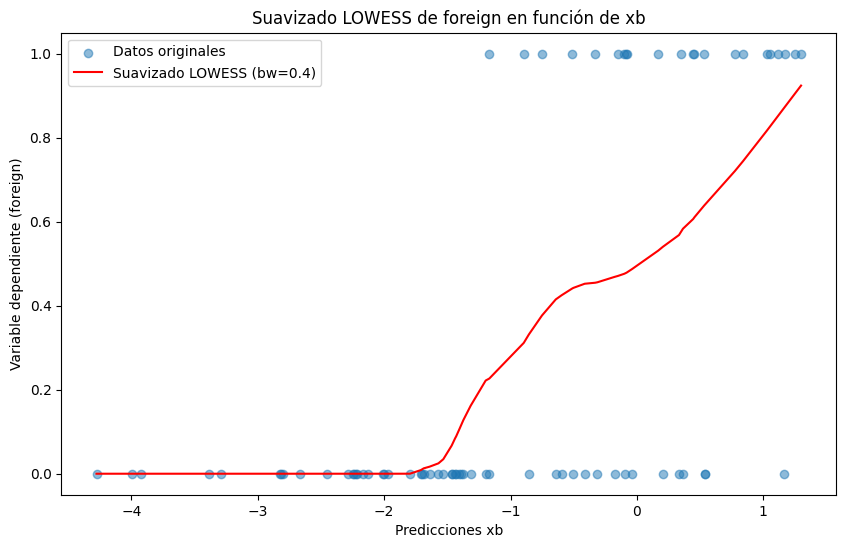

In [16]:
lowess_results = sm.nonparametric.lowess(
    endog=df['foreign'],  # Variable dependiente
    exog=df['xb'],        # Variable independiente
    frac=0.4,             # Ancho de banda equivalente a bw(0.4)
    return_sorted=True,   # Devuelve resultados no ordenados
    it=0,                  # Número de iteraciones
    delta=0.0              # Distancia mínima entre puntos
)

# Crear una nueva columna en el DataFrame para almacenar los valores suavizados
df['psempar'] = lowess_results[:, 1]  # La segunda columna contiene los valores suavizados

# 5. Visualización (opcional)
plt.figure(figsize=(10, 6))
plt.scatter(df['xb'], df['foreign'], label='Datos originales', alpha=0.5)
plt.plot(lowess_results[:, 0], lowess_results[:, 1], color='red', label='Suavizado LOWESS (bw=0.4)')
plt.xlabel('Predicciones xb')
plt.ylabel('Variable dependiente (foreign)')
plt.title('Suavizado LOWESS de foreign en función de xb')
plt.legend()
plt.show()

In [17]:
df.columns

Index(['make', 'price', 'mpg', 'rep78', 'headroom', 'trunk', 'weight',
       'length', 'turn', 'displacement', 'gear_ratio', 'foreign', 'const',
       'xb', 'pprobit', 'xb2', 'xb3', 'psempar'],
      dtype='object')

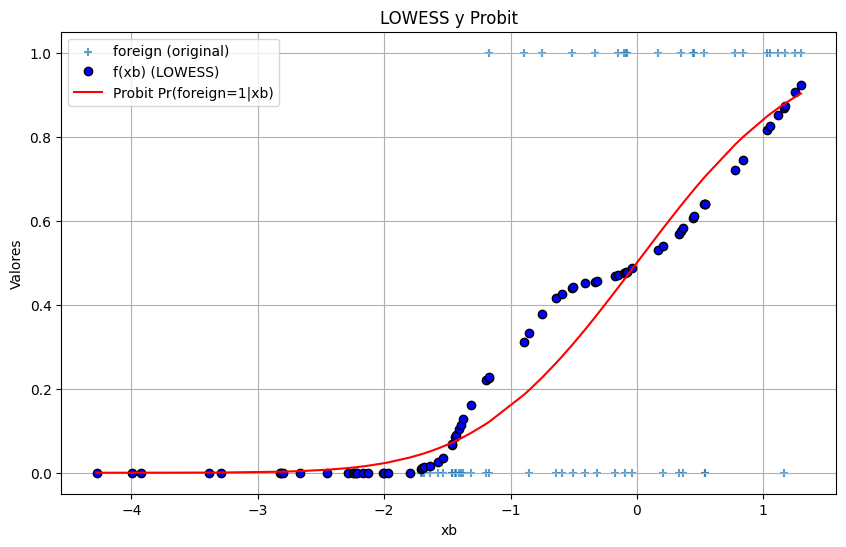

In [18]:
import pandas as pd
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado `df` con las columnas `foreign` y `xb`
# Reemplaza esto con tus datos reales
# np.random.seed(42)
# df = pd.DataFrame({
#     'foreign': np.random.choice([0, 1], size=100),
#     'xb': np.linspace(-3, 3, 100)
# })

# 1. LOWESS (Local Weighted Regression) para generar `psempar`
# lowess_result = lowess(endog=df['foreign'], exog=df['xb'], frac=0.4, return_sorted=False)
# df['psempar'] = lowess_result

# 2. Probit estimado para la probabilidad: Probit Pr(foreign=1 | xb)
from statsmodels.discrete.discrete_model import Probit
probit_model = Probit(df['foreign'], sm.add_constant(df['xb']))
probit_fit = probit_model.fit(disp=False)
df['pprobit'] = probit_fit.predict()
df = df.sort_values('pprobit')


# Etiquetas (similares al uso de `label var` en Stata)
df.rename(columns={'xb': 'xb', 'psempar': 'f(xb)', 'pprobit': 'Probit Pr(foreign=1|xb)'}, inplace=True)

# 3. Visualización
plt.figure(figsize=(10, 6))

# Scatter plot para `foreign` vs `xb`
plt.scatter(df['xb'], df['foreign'], label='foreign (original)', alpha=0.7, marker='+')

# Línea suavizada LOWESS
plt.plot(
    lowess_results[:, 0], 
    lowess_results[:, 1], 
    label='f(xb) (LOWESS)', 
    linestyle='', 
    marker='o',  # Forma de los puntos (círculos)
    markersize=6,  # Tamaño de los puntos
    markerfacecolor='blue',  # Color del relleno de los puntos
    markeredgecolor='black'  # Color del borde de los puntos
)

# Línea ajustada Probit
plt.plot(df['xb'], df['Probit Pr(foreign=1|xb)'], label='Probit Pr(foreign=1|xb)', linestyle='-', color='red')



# Configuración del gráfico
plt.xlabel('xb')
plt.ylabel('Valores')
plt.legend()
plt.title('LOWESS y Probit')
plt.grid(True)
plt.show()


In [19]:
#De la inspección de las dos curvas, uno decide visualmente si se parece a una distribución normal o no. Sin embargo, para ser rigurosos, debiera efectuarse un test. Minuto 34:28.

In [33]:
#¿Qué pasa ante heterocedasticidad de los errores?
#Cuando hay heterocedasticidad, y se estima un probit o un logit, los estimadores no son consistentes. 
#En modelo probit, se altera el argumento. El efecto marginal: el signo del efecto marginal es el opuesto al signo del argumento 0, y no depende del signo del argumento 1. 
#Se pierde capacidad de interpretar el signo del coefciente.

#Cuando se habla de un modelo probit generalizado, hace mención a uno en donde se puedan campturar distintas formas funcionales de la varianza y/o hererocedasticidad (multiplicativa, logaritmica, etc.). Similar al proceso de White en regresión lineal.
#Especificando una forma funcional de los errores se capturan varios tipos de heterocedasticidad.
#Nuevamente, el efecto marginal no será igual al signo del coeficiente estimado necesariamente. Minuto: 1:09.

In [34]:
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\DiTella\MEC\Materias\2024 3T\[MT06] Microeconometría I\Clases\Stata\auto.dta"

df2, meta = st.read_dta(path)

In [36]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit

# Variables independientes para el modelo de media
X = sm.add_constant(df2[["weight", "mpg"]])

# Variable dependiente
y = df2["foreign"]

# Ajustar un modelo Probit estándar
probit_model = Probit(y, X).fit()
print(probit_model.summary())

# Modelo heterocedástico
# Función de la varianza dependiente de mpg
def heteroskedastic_probit(params, y, X, Z):
    beta = params[:X.shape[1]]  # Coeficientes de media
    gamma = params[X.shape[1]:]  # Coeficientes de varianza
    
    xb = np.dot(X, beta)  # Predicción de la media
    sigma = np.exp(np.dot(Z, gamma))  # Función de varianza (exp garantiza valores positivos)
    
    # Verosimilitud del modelo
    prob = sm.distributions.norm.cdf(xb / sigma)
    ll = y * np.log(prob) + (1 - y) * np.log(1 - prob)
    return -np.sum(ll)

# Variables para la heterocedasticidad
Z = sm.add_constant(df2["mpg"])

# Inicializar parámetros
initial_params = np.zeros(X.shape[1] + Z.shape[1])

# Optimización
from scipy.optimize import minimize
result = minimize(
    heteroskedastic_probit, 
    initial_params, 
    args=(y, X, Z), 
    method='BFGS'
)

# Resultados
params = result.x
beta = params[:X.shape[1]]  # Coeficientes del modelo de media
gamma = params[X.shape[1]:]  # Coeficientes del modelo de varianza

print("Coeficientes del modelo de media:", beta)
print("Coeficientes del modelo de varianza:", gamma)

Optimization terminated successfully.
         Current function value: 0.362759
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                foreign   No. Observations:                   74
Model:                         Probit   Df Residuals:                       71
Method:                           MLE   Df Model:                            2
Date:                Tue, 21 Jan 2025   Pseudo R-squ.:                  0.4039
Time:                        23:31:18   Log-Likelihood:                -26.844
converged:                       True   LL-Null:                       -45.033
Covariance Type:            nonrobust   LLR p-value:                 1.261e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2755      2.554      3.240      0.001       3.269      13.281
weight        -0.0023      0.

AttributeError: module 'statsmodels.distributions' has no attribute 'norm'

In [23]:
# Cargar datos y preparar variables
y = np.where(df2['foreign'] == 1, 1, -1)  # Transformar foreign para que sea -1 y 1
X = df2[['weight', 'mpg']]  # Variables explicativas
X = sm.add_constant(X)  # Agregar constante para el intercepto
Z = df2[['mpg']]  # Variable de heterocedasticidad
Z = sm.add_constant(Z)  # Agregar constante para la heterocedasticidad

In [24]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize
import statsmodels.api as sm

def log_likelihood(params, X, Z, y):
    # Parámetros para el modelo probit heterocedástico
    k = X.shape[1]  # Número de coeficientes de X
    beta = params[:k]  # Coeficientes para el predictor lineal
    gamma = params[k:]  # Coeficientes para la heterocedasticidad

    # Media y desviación estándar del modelo
    mean = X @ beta
    std_dev = np.exp(Z @ gamma)  # Para asegurar desviación positiva

    # Verosimilitud logarítmica
    prob = norm.cdf(y * mean / std_dev)  # Probabilidades predichas
    log_likelihood = np.sum(np.log(prob + 1e-9))  # Evita log(0) con 1e-9

    return -log_likelihood  # Minimizar: negativo de la log-verosimilitud

def fit_heteroskedastic_probit(X, Z, y):
    # Inicialización de parámetros (0 para beta y gamma)
    initial_params = np.zeros(X.shape[1] + Z.shape[1])

    # Minimización de la función de verosimilitud
    result = minimize(log_likelihood, initial_params, args=(X, Z, y),
                      method='BFGS')

    # Resultado del ajuste
    return result

In [25]:
result = fit_heteroskedastic_probit(X, Z, y)
print("Parámetros estimados:", result.x)
print("Información de ajuste:", result)

Parámetros estimados: [ 1.76235981e+01 -3.30671794e-03 -4.14820299e-01 -8.91943324e+00
  3.66825620e-01]
Información de ajuste:   message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 17.910407248610916
        x: [ 1.762e+01 -3.307e-03 -4.148e-01 -8.919e+00  3.668e-01]
      nit: 29
      jac: [-5.848e-04  6.958e+00 -3.473e-02 -3.817e-03 -8.572e-02]
 hess_inv: [[ 1.101e+02 -1.986e-02 ...  2.494e+01 -8.017e-01]
            [-1.986e-02  3.603e-06 ... -4.692e-03  1.533e-04]
            ...
            [ 2.494e+01 -4.692e-03 ...  1.635e+01 -6.183e-01]
            [-8.017e-01  1.533e-04 ... -6.183e-01  2.393e-02]]
     nfev: 503
     njev: 82


In [26]:
result.x

array([ 1.76235981e+01, -3.30671794e-03, -4.14820299e-01, -8.91943324e+00,
        3.66825620e-01])

In [27]:
result

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 17.910407248610916
        x: [ 1.762e+01 -3.307e-03 -4.148e-01 -8.919e+00  3.668e-01]
      nit: 29
      jac: [-5.848e-04  6.958e+00 -3.473e-02 -3.817e-03 -8.572e-02]
 hess_inv: [[ 1.101e+02 -1.986e-02 ...  2.494e+01 -8.017e-01]
            [-1.986e-02  3.603e-06 ... -4.692e-03  1.533e-04]
            ...
            [ 2.494e+01 -4.692e-03 ...  1.635e+01 -6.183e-01]
            [-8.017e-01  1.533e-04 ... -6.183e-01  2.393e-02]]
     nfev: 503
     njev: 82

In [28]:
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\DiTella\MEC\Materias\2024 3T\[MT06] Microeconometría I\Clases\Stata\auto.dta"

df3, meta = st.read_dta(path)

In [29]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import minimize
from scipy.stats import chi2
import statsmodels.api as sm

# Preparar los datos
y = np.where(df3['foreign'] == 1, 1, -1)  # Variable dependiente en formato -1 y 1
X = df3[['weight', 'mpg']]  # Variables independientes
X = sm.add_constant(X)  # Agregar constante para el intercepto
Z = df3[['mpg']]  # Variable para la heterocedasticidad
Z = sm.add_constant(Z)  # Agregar constante para la heterocedasticidad

# Función de log-verosimilitud para el modelo heterocedástico
def log_likelihood(params, X, Z, y):
    k = X.shape[1]  # Número de coeficientes en X
    beta = params[:k]  # Coeficientes para X
    gamma = params[k:]  # Coeficientes para Z (heterocedasticidad)

    # Media y desviación estándar del modelo
    mean = X @ beta
    std_dev = np.exp(Z @ gamma)  # Para asegurar desviación positiva

    # Verosimilitud logarítmica
    prob = norm.cdf(y * mean / std_dev)
    log_likelihood = np.sum(np.log(prob + 1e-9))

    return -log_likelihood  # Negativo para minimizar

# Función para ajustar el modelo
def fit_heteroskedastic_probit(X, Z, y):
    initial_params = np.zeros(X.shape[1] + Z.shape[1])

    result = minimize(log_likelihood, initial_params, args=(X, Z, y), method='BFGS')
    return result

# Ajuste del modelo
result = fit_heteroskedastic_probit(X, Z, y)

# Coeficientes estimados
params = result.x
log_likelihood_value = -result.fun  # Log likelihood

# Número de observaciones
n_obs = len(y)

# Calcular errores estándar, z-scores, p-valores e intervalos de confianza
hessian_inv = result.hess_inv  # Matriz de covarianza estimada
stderr = np.sqrt(np.diag(hessian_inv))  # Errores estándar
z_scores = params / stderr
p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))
conf_int = np.vstack([params - 1.96 * stderr, params + 1.96 * stderr]).T

# Crear un DataFrame para presentar los resultados
summary_df3 = pd.DataFrame({
    'Coefficient': params,
    'Std. err.': stderr,
    'z': z_scores,
    'P>|z|': p_values,
    '[95% Conf. Interval] Lower': conf_int[:, 0],
    '[95% Conf. Interval] Upper': conf_int[:, 1]
}, index=['const_foreign', 'weight', 'mpg', 'const_insigma', 'mpg_insigma'])

# Wald test para la significancia de los coeficientes en el modelo
wald_stat = np.sum((params / stderr) ** 2)
wald_p_value = chi2.sf(wald_stat, df=len(params))

# LR test para Insigma=0 (heterocedasticidad)
# 1. Modelo sin heterocedasticidad (homocedástico)
def log_likelihood_homoskedastic(params, X, y):
    beta = params
    mean = X @ beta
    prob = norm.cdf(y * mean)
    log_likelihood = np.sum(np.log(prob + 1e-9))
    return -log_likelihood

initial_params_homo = np.zeros(X.shape[1])
result_homo = minimize(log_likelihood_homoskedastic, initial_params_homo, args=(X, y), method='BFGS')
log_likelihood_homo = -result_homo.fun

# 2. Cálculo del estadístico de prueba LR
lr_stat = 2 * (log_likelihood_value - log_likelihood_homo)
lr_p_value = chi2.sf(lr_stat, df=1)

# Presentación de resultados
print("Heteroskedastic probit model")
print(f"Number of obs = {n_obs}")
print(f"Log likelihood = {log_likelihood_value:.5f}")
print(f"Wald chi2({len(params)}) = {wald_stat:.2f}")
print(f"Prob > chi2 = {wald_p_value:.4f}\n")

print(summary_df3)
print("\nLR test of Insigma=0: chi2(1) =", round(lr_stat, 2))
print("Prob > chi2 =", round(lr_p_value, 4))


Heteroskedastic probit model
Number of obs = 74
Log likelihood = -17.91041
Wald chi2(5) = 18.91
Prob > chi2 = 0.0020

               Coefficient  Std. err.         z     P>|z|  \
const_foreign    17.623598  10.492529  1.679633  0.093029   
weight           -0.003307   0.001898 -1.742124  0.081487   
mpg              -0.414820   0.258993 -1.601669  0.109229   
const_insigma    -8.919433   4.043209 -2.206028  0.027382   
mpg_insigma       0.366826   0.154703  2.371166  0.017732   

               [95% Conf. Interval] Lower  [95% Conf. Interval] Upper  
const_foreign                   -2.941759                   38.188955  
weight                          -0.007027                    0.000414  
mpg                             -0.922446                    0.092805  
const_insigma                  -16.844123                   -0.994744  
mpg_insigma                      0.063609                    0.670043  

LR test of Insigma=0: chi2(1) = 17.87
Prob > chi2 = 0.0


In [30]:
# Índices de los coeficientes del modelo principal (excluyendo Insigma)
main_model_indices = [1, 2]  # Indices de 'weight' y 'mpg'

# Coeficientes y errores estándar solo del modelo principal
params_main = params[main_model_indices]
stderr_main = stderr[main_model_indices]

# Cálculo del estadístico de Wald para el modelo principal
wald_stat_main = np.sum((params_main / stderr_main) ** 2)
wald_p_value_main = chi2.sf(wald_stat_main, df=len(params_main))

# Presentación de resultados del estadístico de Wald ajustado
print(f"Wald chi2({len(params_main)}) = {wald_stat_main:.2f}")
print(f"Prob > chi2 = {wald_p_value_main:.4f}")

Wald chi2(2) = 5.60
Prob > chi2 = 0.0608


In [31]:
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\DiTella\MEC\Materias\2024 3T\[MT06] Microeconometría I\Clases\Stata\auto.dta"

df, meta = st.read_dta(path)

In [32]:
import numpy as np
import statsmodels.api as sm
from scipy.optimize import fmin_bfgs
from scipy.stats import norm, chi2

# Asumimos que tu DataFrame se llama df y las variables son 'foreign', 'weight', 'mpg'

# Variables del modelo principal
X_main = df[['weight', 'mpg']]
X_main = sm.add_constant(X_main)  # Agregar constante solo para el modelo principal

# Variables de heterocedasticidad (sin constante, según la especificación de Stata)
Z_het = df[['mpg']]  # Variable que define la heterocedasticidad

# Definir la variable dependiente
y = np.where(df3['foreign'] == 1, 1, -1)

# Modelo Probit Heterocedástico
model = sm.Probit(y, X_main)
initial_params = np.append(np.zeros(X_main.shape[1]), np.zeros(Z_het.shape[1]))

# Función de verosimilitud con heterocedasticidad
def heteroskedastic_probit_likelihood(params, X, Z, y):
    beta = params[:X.shape[1]]
    gamma = params[X.shape[1]:]
    # Heterocedasticidad: exp(Z * gamma)
    sigma = np.exp(Z @ gamma)
    # Probabilidad ajustada para heterocedasticidad
    XB = X @ beta / sigma
    # Log-verosimilitud
    llf = y * np.log(norm.cdf(XB)) + (1 - y) * np.log(1 - norm.cdf(XB))
    return -np.sum(llf)

# Optimizar la función de verosimilitud
result = fmin_bfgs(
    f=heteroskedastic_probit_likelihood, 
    x0=initial_params, 
    args=(X_main, Z_het, y), 
    full_output=True
)

params = result[0]
log_likelihood = -result[1]

# Separar los coeficientes de las partes principal y de heterocedasticidad
beta_hat = params[:X_main.shape[1]]
gamma_hat = params[X_main.shape[1]:]

# Calcular error estándar y estadístico de Wald solo para la parte principal
hessian_inv = result[3]  # Matriz de covarianza de los parámetros estimados
stderr = np.sqrt(np.diag(hessian_inv))

# Indices para el modelo principal (sin heterocedasticidad)
main_model_indices = np.arange(X_main.shape[1])

params_main = beta_hat  # Coeficientes principales
stderr_main = stderr[main_model_indices]

# Estadístico de Wald para las variables principales (excluye heterocedasticidad)
wald_stat_main = np.sum((params_main / stderr_main) ** 2)
wald_p_value_main = chi2.sf(wald_stat_main, df=len(params_main))

# Presentación de los resultados
print(f"Log likelihood = {log_likelihood:.5f}")
print("\nModelo principal:")
for i, name in enumerate(X_main.columns):
    print(f"{name}: Coeficiente = {params_main[i]:.4f}, Std.Err = {stderr_main[i]:.4f}")

print("\nHeterocedasticidad:")
for i, name in enumerate(Z_het.columns):
    print(f"{name} (Insigma): Coeficiente = {gamma_hat[i]:.4f}, Std.Err = {stderr[X_main.shape[1] + i]:.4f}")

print(f"\nWald chi2({len(params_main)}) = {wald_stat_main:.2f}")
print(f"Prob > chi2 = {wald_p_value_main:.4f}")

# LR test of Insigma=0
lr_test_stat = 2 * (log_likelihood - sm.Probit(y, X_main).fit(disp=0).llf)
lr_p_value = chi2.sf(lr_test_stat, df=len(Z_het.columns))

print(f"\nLR test of Insigma=0: chi2({len(Z_het.columns)}) = {lr_test_stat:.2f}")
print(f"Prob > chi2 = {lr_p_value:.4f}")

ValueError: endog must be in the unit interval.

In [55]:
# Estimar gamma (puedes ajustarlo a tus datos)
gamma = 0.1  # Este es un ejemplo, ajusta según sea necesario

# Calcular la varianza de los errores usando mpg
df['var_e'] = np.exp(gamma * df['mpg']) ** 2

# Crear el vector de pesos como el inverso de la varianza
df['weights'] = 1 / df['var_e']

# Ajustar el modelo WLS
X = sm.add_constant(df[['weight', 'mpg']])  # Añadir el término constante
model = sm.WLS(df['foreign'], X, weights=df['weights'])
results = model.fit()

# Mostrar resultados
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                foreign   R-squared:                       0.470
Model:                            WLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     31.53
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           1.59e-10
Time:                        21:40:34   Log-Likelihood:                -462.12
No. Observations:                  74   AIC:                             930.2
Df Residuals:                      71   BIC:                             937.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7315      0.864      5.477      0.0

In [56]:
# 1. Ajustar el modelo Probit inicial
X_probit = sm.add_constant(df[['weight', 'mpg']])
model_probit = sm.Probit(df['foreign'], X_probit)
results_probit = model_probit.fit()

# Mostrar resultados del modelo Probit
print("Resultados del modelo Probit:")
print(results_probit.summary())

# 2. Ajustar el modelo de regresión de mpg sobre gear_ratio
X_mpg = sm.add_constant(df['gear_ratio'])
model_mpg = sm.OLS(df['mpg'], X_mpg)
results_mpg = model_mpg.fit()

# Predecir residuos
df['v2'] = results_mpg.resid

# 3. Ajustar el modelo Probit con v2
X_probit_iv = sm.add_constant(df[['weight', 'mpg', 'v2']])
model_probit_iv = sm.Probit(df['foreign'], X_probit_iv)
results_probit_iv = model_probit_iv.fit()

# Mostrar resultados del segundo modelo Probit
print("\nResultados del modelo Probit con v2:")
print(results_probit_iv.summary())

Optimization terminated successfully.
         Current function value: 0.362759
         Iterations 7
Resultados del modelo Probit:
                          Probit Regression Results                           
Dep. Variable:                foreign   No. Observations:                   74
Model:                         Probit   Df Residuals:                       71
Method:                           MLE   Df Model:                            2
Date:                Sat, 26 Oct 2024   Pseudo R-squ.:                  0.4039
Time:                        21:49:56   Log-Likelihood:                -26.844
converged:                       True   LL-Null:                       -45.033
Covariance Type:            nonrobust   LLR p-value:                 1.261e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2755      2.554      3.240      0.001       3.269      13.281

In [1]:
# from linearmodels.iv import IVProbit
# # 4. Ajustar el modelo IVProbit
# iv_model = IVProbit.from_formula('foreign ~ weight + [mpg ~ gear_ratio]', data=df)
# results_iv = iv_model.fit()

# # Mostrar resultados del modelo IVProbit
# print("\nResultados del modelo IVProbit:")
# print(results_iv.summary())

In [60]:
# 1. Ajustar el modelo Probit inicial
X_probit = sm.add_constant(df[['weight', 'mpg']])
model_probit = sm.Probit(df['foreign'], X_probit)
results_probit = model_probit.fit()

# Mostrar resultados del modelo Probit
print("Resultados del modelo Probit:")
print(results_probit.summary())

# 2. Ajustar el modelo de regresión de mpg sobre gear_ratio
X_mpg = sm.add_constant(df['gear_ratio'])
model_mpg = sm.OLS(df['mpg'], X_mpg)
results_mpg = model_mpg.fit()

# Predecir residuos
df['v2'] = results_mpg.resid

# 3. Ajustar el modelo Probit con v2
X_probit_iv = sm.add_constant(df[['weight', 'v2']])
model_probit_iv = sm.Probit(df['foreign'], X_probit_iv)
results_probit_iv = model_probit_iv.fit()

# Mostrar resultados del segundo modelo Probit
print("\nResultados del modelo Probit con v2:")
print(results_probit_iv.summary())

Optimization terminated successfully.
         Current function value: 0.362759
         Iterations 7
Resultados del modelo Probit:
                          Probit Regression Results                           
Dep. Variable:                foreign   No. Observations:                   74
Model:                         Probit   Df Residuals:                       71
Method:                           MLE   Df Model:                            2
Date:                Sat, 26 Oct 2024   Pseudo R-squ.:                  0.4039
Time:                        21:55:51   Log-Likelihood:                -26.844
converged:                       True   LL-Null:                       -45.033
Covariance Type:            nonrobust   LLR p-value:                 1.261e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2755      2.554      3.240      0.001       3.269      13.281